In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
matplotlib.use('Agg')
%matplotlib inline
import cv2
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.figsize'] = [17, 17]

In [22]:
circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#circle_kernel[0][1]=1
#circle_kernel[0][3]=1
#circle_kernel[4][1]=1
#circle_kernel[4][3]=1
print(circle_kernel)
print("\n")
square_kernel = np.ones((3,3),np.uint8)
print(square_kernel)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


[[1 1 1]
 [1 1 1]
 [1 1 1]]


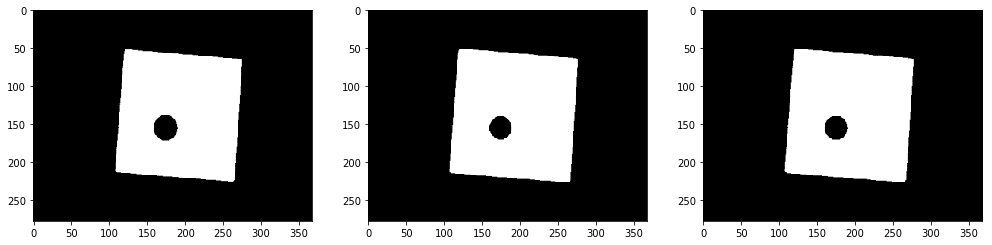

In [23]:
Square_circle = cv2.imread('image_folder\Square-circle.png',1)
square_dilation = cv2.dilate(Square_circle,square_kernel,iterations = 1)
circle_dilation = cv2.dilate(Square_circle,circle_kernel,iterations = 1)

Square_circle_fig = plt.figure()
ax1 = Square_circle_fig.add_subplot(1,3,1)
ax1.imshow(Square_circle)
ax2 = Square_circle_fig.add_subplot(1,3,2)
ax2.imshow(square_dilation)
ax3 = Square_circle_fig.add_subplot(1,3,3)
ax3.imshow(circle_dilation)

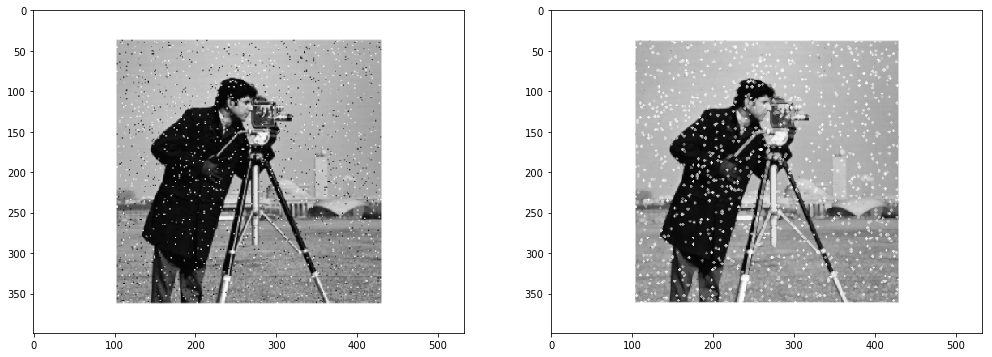

In [24]:
Cameraman = cv2.imread('image_folder\Cameraman.png',1)
cameraman_denoised = cv2.dilate(Cameraman,circle_kernel,iterations = 1)

cameraman_fig = plt.figure()
ax1 = cameraman_fig.add_subplot(1,2,1)
ax1.imshow(Cameraman)
ax2 = cameraman_fig.add_subplot(1,2,2)
ax2.imshow(cameraman_denoised)